In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




In [3]:
df = pd.read_csv('data/data.csv')

DATA CHECKS TO PERFORM

- MISSING VALUES
- DUPLICATES
- DATA TYPES
- THE NUMBER OF UNIQUE VALUES OF EACH COLUMN
- STATISTICS OF DATA SET
- VARIOUS CATEGORIES IN THE DIFFERENT CATEGORICAL COLUMN


In [4]:
# missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
#data stats
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


INSIGHTS

- all means are very close.
- all SD's are also very close - between 14.6 and 15.19.
- min maths score is 0 for maths, much higher ,10 for writing and even higher for reading 17.

Exploring Data

In [8]:
print("Categories in 'gender' variable :       ",end="")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable :       ",end="")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable :       ",end="")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable :       ",end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable :       ",end="")
print(df['test preparation course'].unique())





Categories in 'gender' variable :       ['female' 'male']
Categories in 'race/ethnicity' variable :       ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :       ['standard' 'free/reduced']
Categories in 'test preparation course' variable :       ['none' 'completed']


In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype== "O"]

print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))


We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
## ADDING COLUMNS FOR "TOTAL SCORE" AND "AVERAGE"

df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [ ]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')


Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [13]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')

Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


INSIGHTS

- students have performed worst in maths
- best performance in reading section


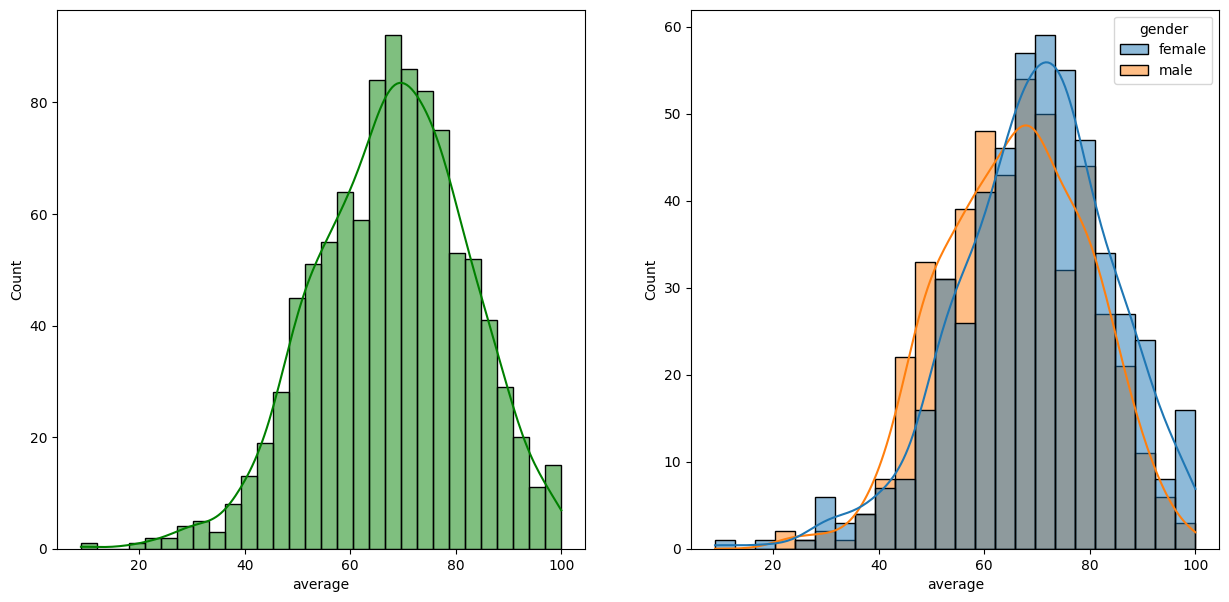

In [14]:
# VISUALIZATION

fig , axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

Insights

- Female students tend to perform well then male students.

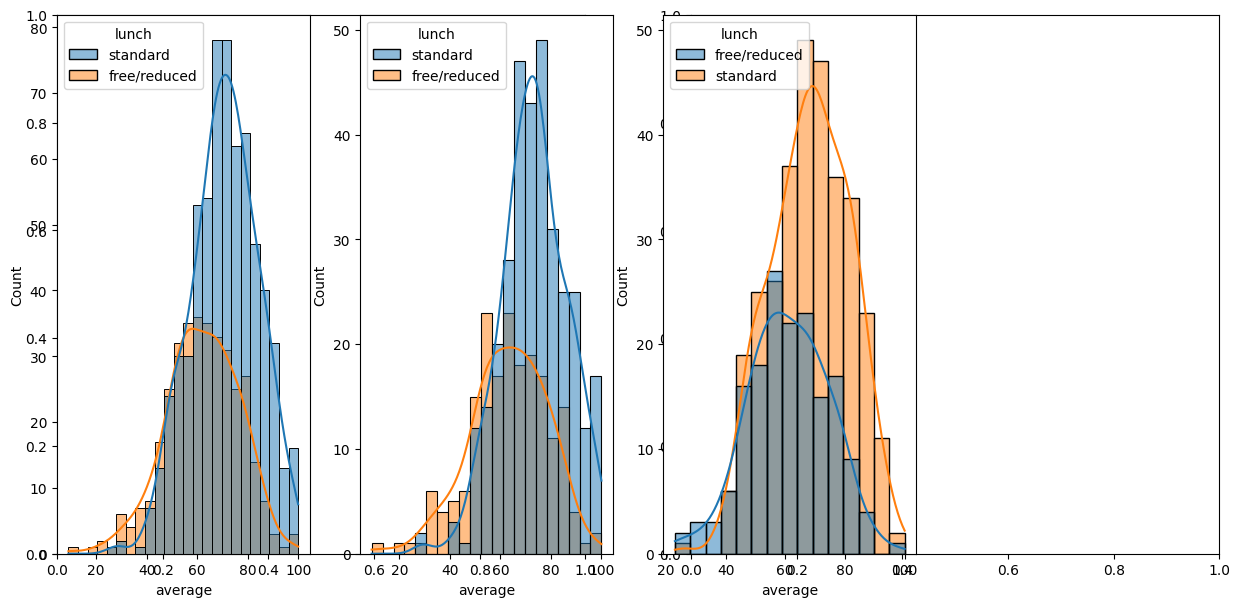

In [15]:
plt.subplots(1, 2, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

INSIGHT

- standard lunch helps perform well in exams.
- stamndard lunch helps perform well in exams be it a male or a female.


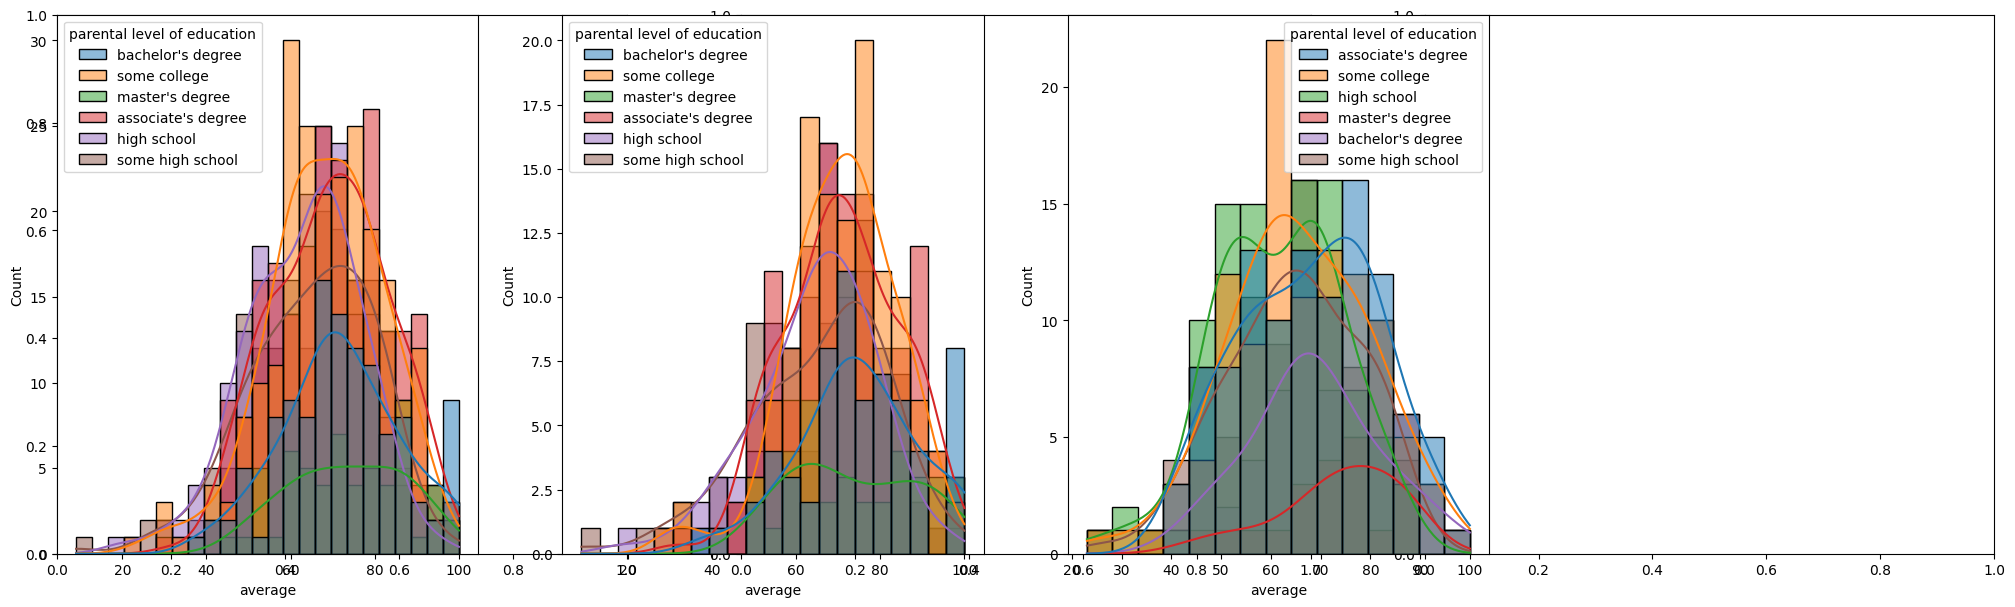

In [16]:
plt.subplots(1, 3, figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

INSIGHT

- in general, parents education don't help the students in exam.
- male students whose parents have associates degree or masters tend to perform higher in exam.
- not much effect of parental education on female students.



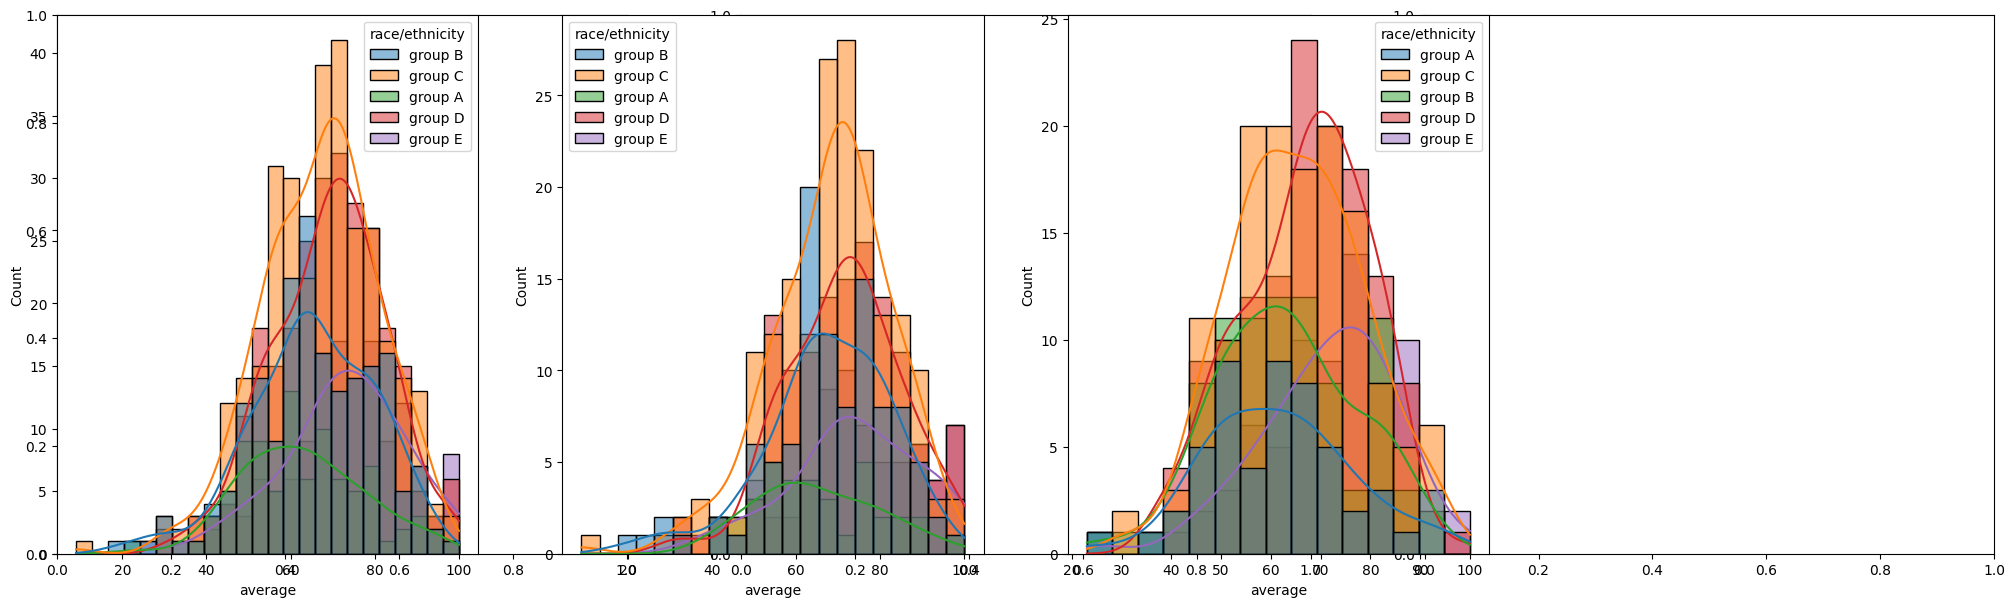

In [17]:
plt.subplots(1, 3, figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

INSIGHTS

- group A and group B performs poorly in exam.
- group A and B performs poorly irrespective of their gender.

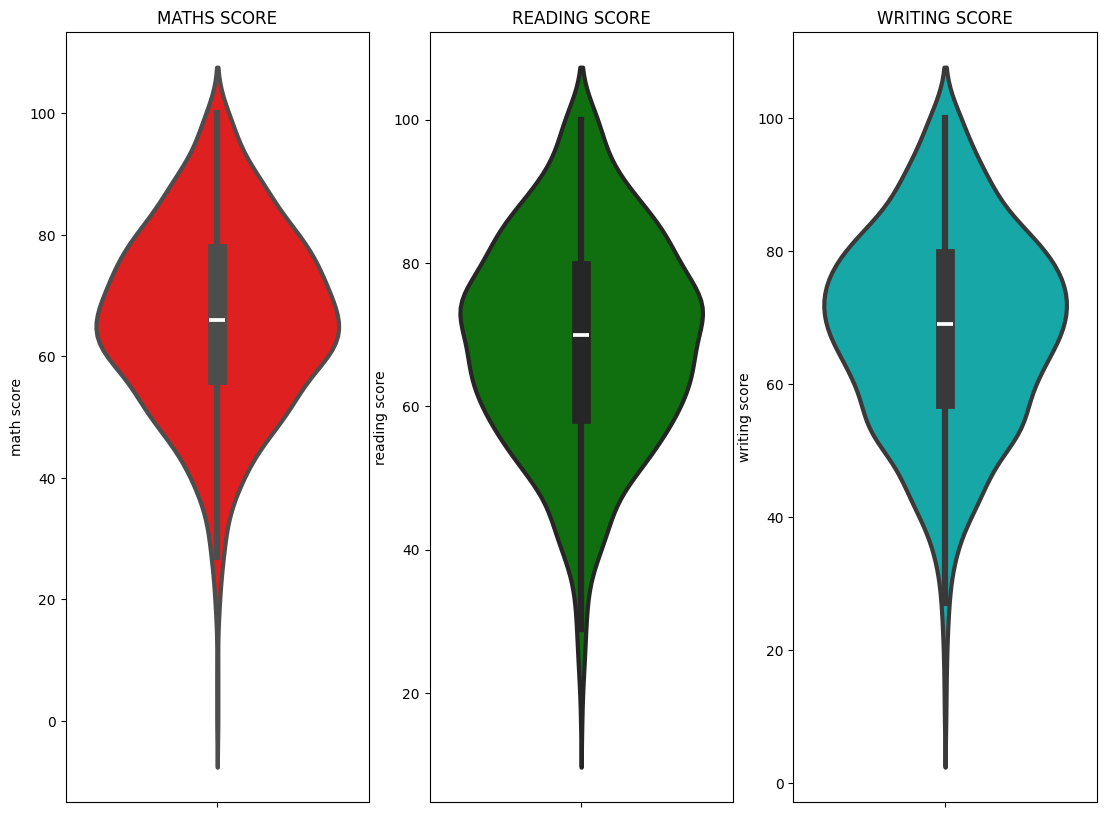

In [ ]:
#Maximum score of students in all three subjects.

plt.figure(figsize=(18,10))
plt.subplot(1,4,1)
plt.title('MATHS SCORE')
sns.violinplot(y = 'math score',data = df , color='r',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y = 'reading score',data = df , color='g',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y = 'writing score',data = df , color='c',linewidth=3)
plt.show()

INSIGHTS

- most students score b/w 60-80 in maths whereas b/w 50-80 for reading and writing.


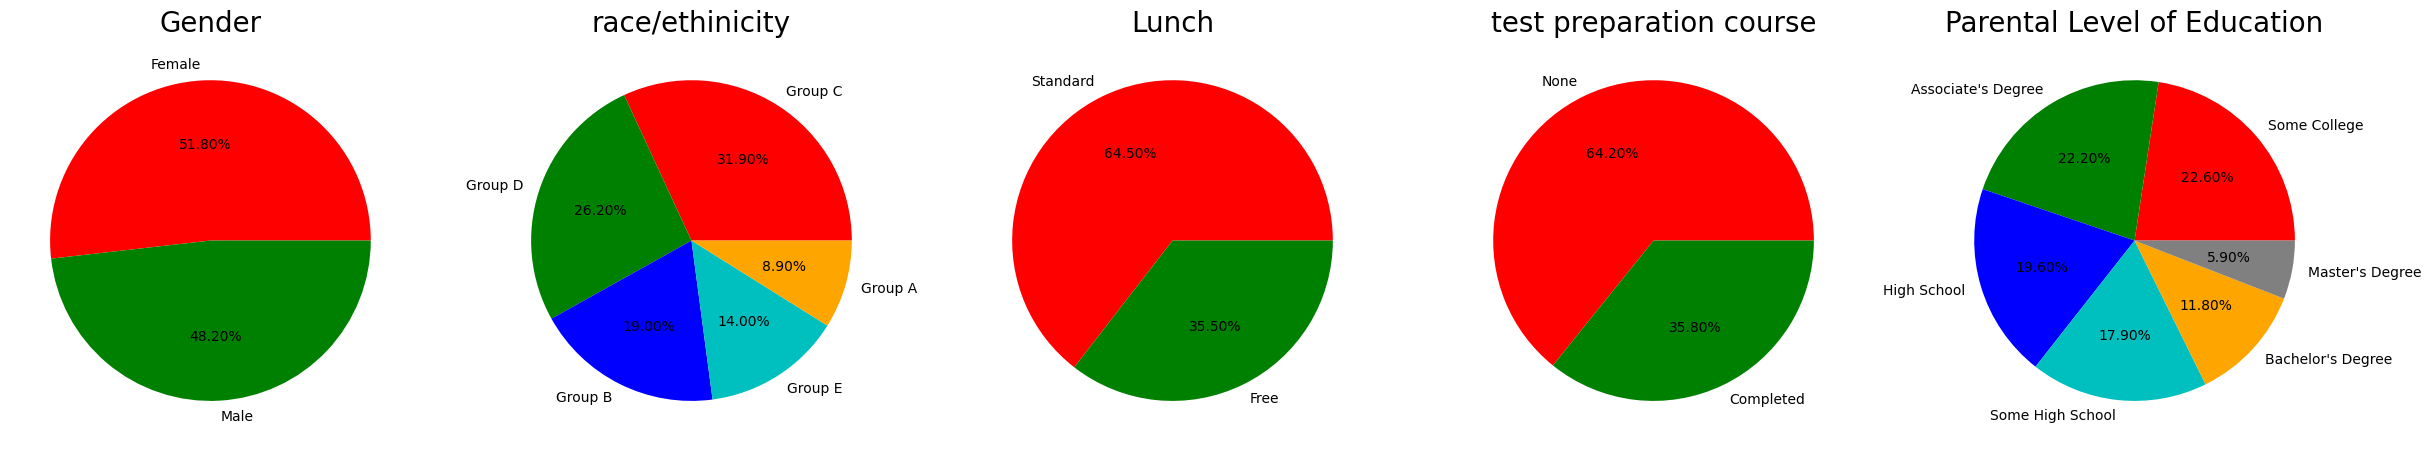

<Figure size 3000x1200 with 0 Axes>

In [19]:
#MULTIVARIATE ANALYSIS

plt.rcParams['figure.figsize']= (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size, colors= color, labels = labels, autopct = '%1.2f%%' )
plt.title('Gender',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color = ['r','g','b','c','orange']

plt.pie(size, colors= color, labels = labels, autopct = '%1.2f%%')
plt.title('race/ethinicity',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['r','g']

plt.pie(size, colors= color, labels = labels, autopct = '%1.2f%%' )
plt.title('Lunch',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None','Completed'
color = ['r','g']

plt.pie(size, colors= color, labels = labels, autopct = '%1.2f%%' )
plt.title('test preparation course',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = 'Some College',"Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['r','g','b','c','orange','grey']

"""
plt.pie(size, colors= color, labels = labels, autopct = '%1.2f%%' )
plt.title('parental level of education',fontsize = 20)
plt.axis('off')
"""

if len(size) == len(labels) == len(color):
    plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
    plt.title('Parental Level of Education', fontsize=20)
    plt.axis('off')  
    plt.show()
else:
    pass


plt.tight_layout()


plt.show()



INSIGHTS

- no. of male and female students are almost equal
- largest group of students is group C.
- no of male and female students is almost equal.
- no . of students who have not enrolled in any test preparation is greater.


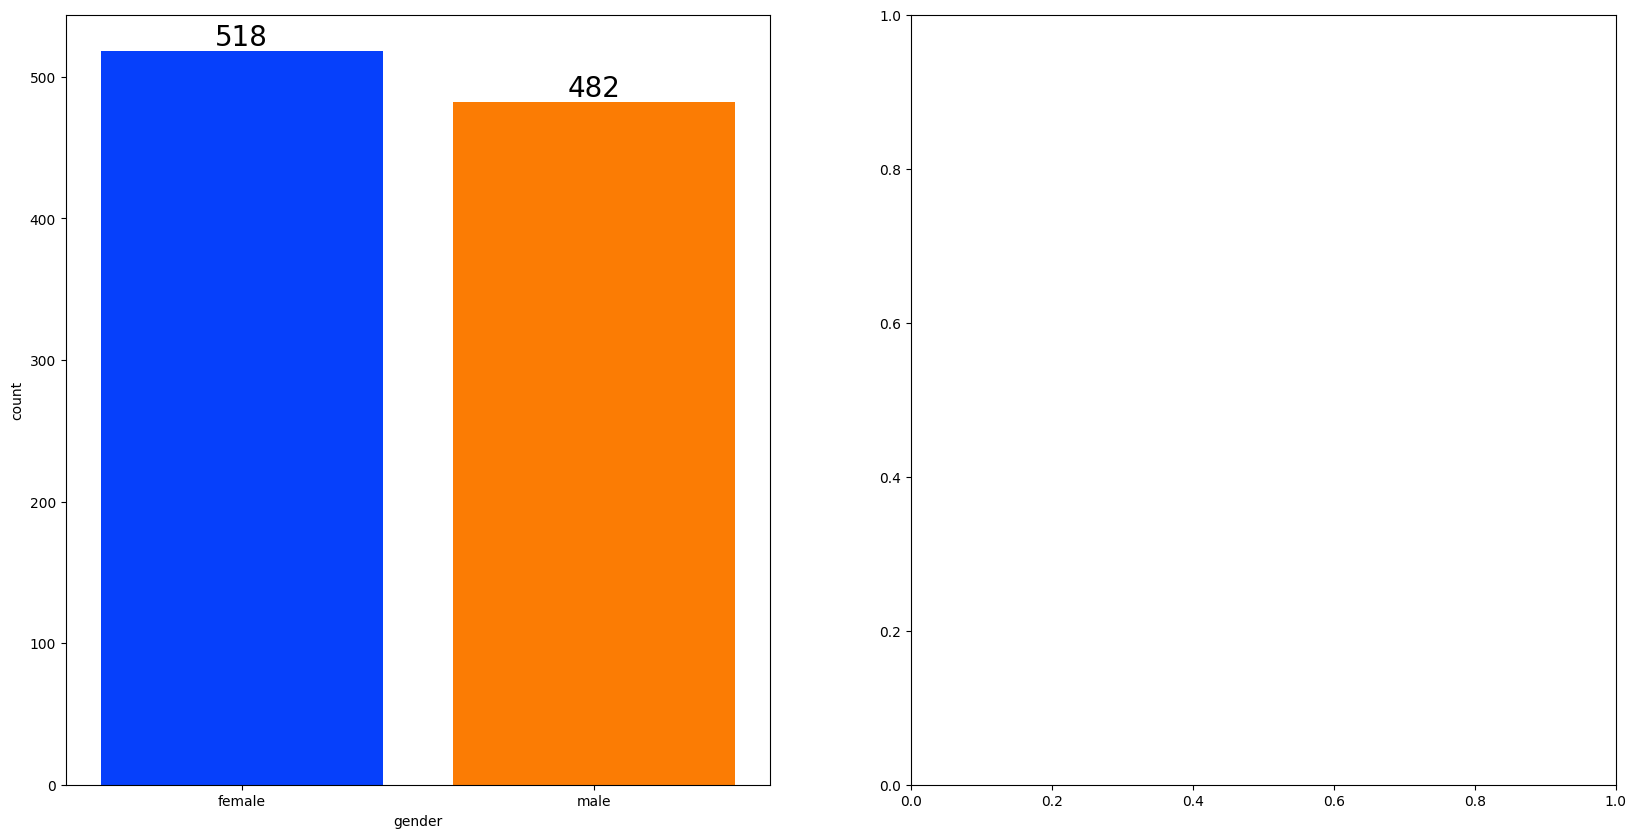

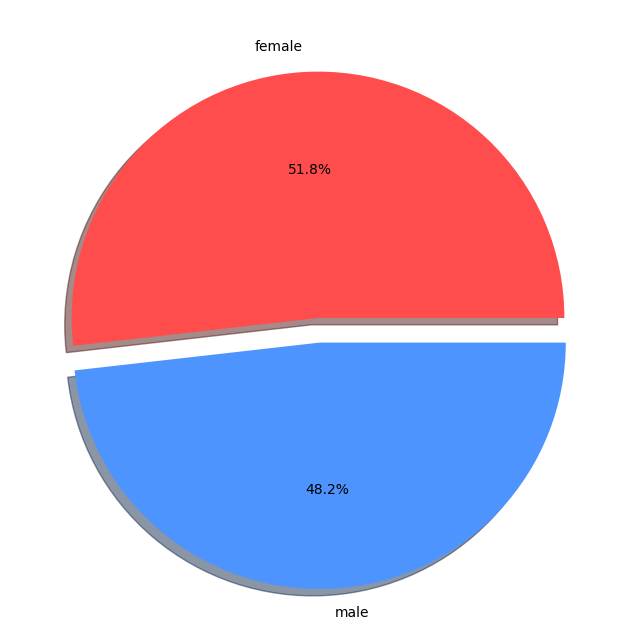

In [20]:
# UNIVARIATE ANALYSIS

f, ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.97)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)


gender_counts = df['gender'].value_counts().sort_index() 
labels = gender_counts.index.tolist()  
sizes = gender_counts.values  
explode = [0, 0.1]  


plt.figure(figsize=(10, 8))
plt.pie(
    sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#4d94ff'] 
)  
plt.show()

INSIGHTS

- no. of females is 51.8 and males is 48.2 .

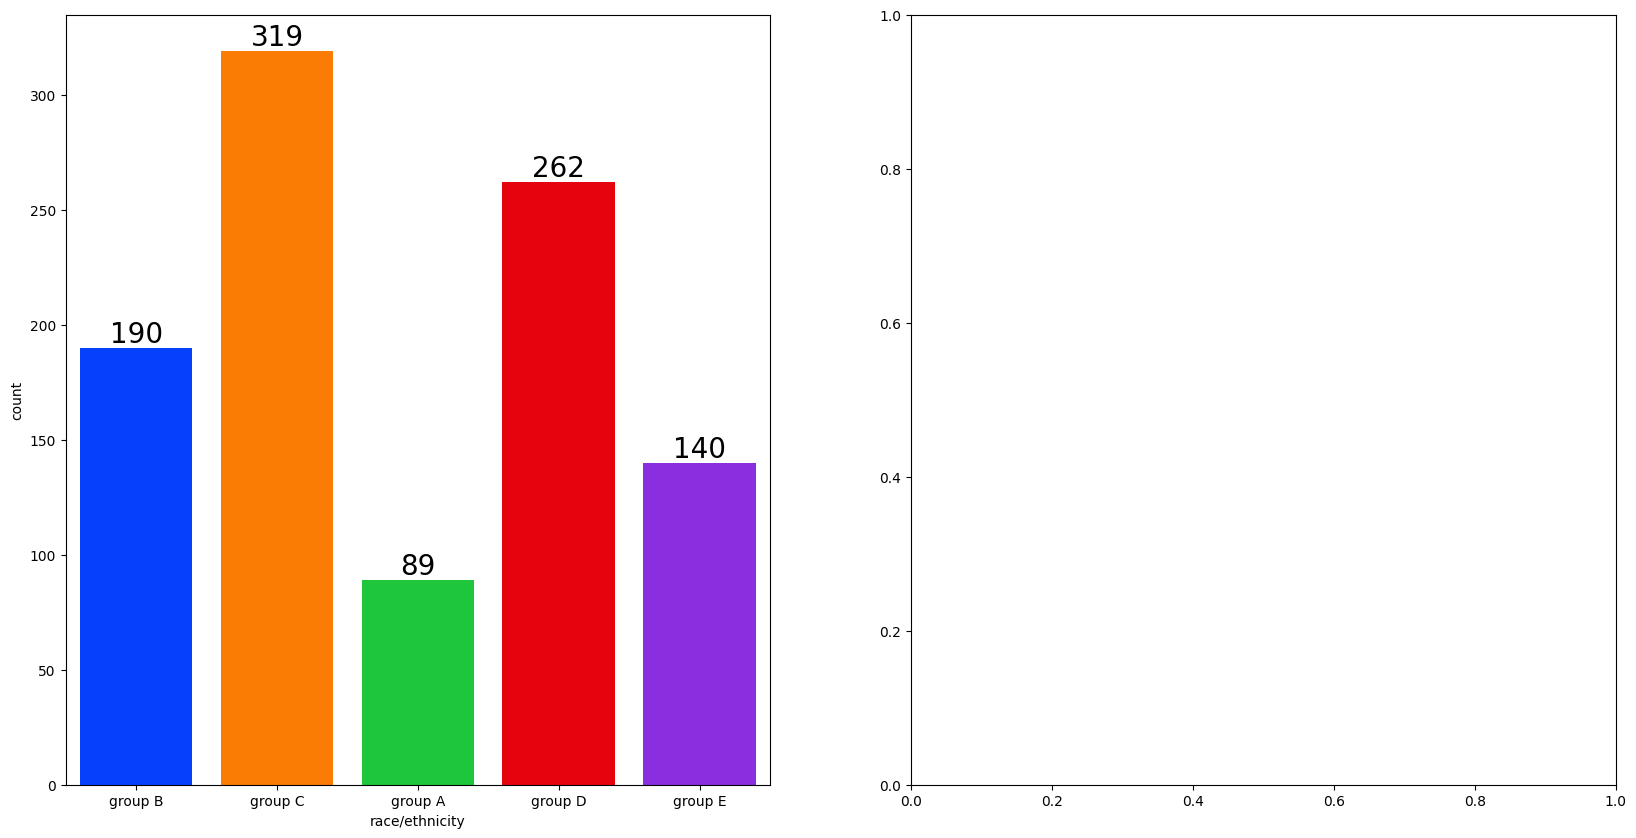

In [21]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.97)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

gender_counts = df['race/ethnicity'].value_counts()

plt.show()


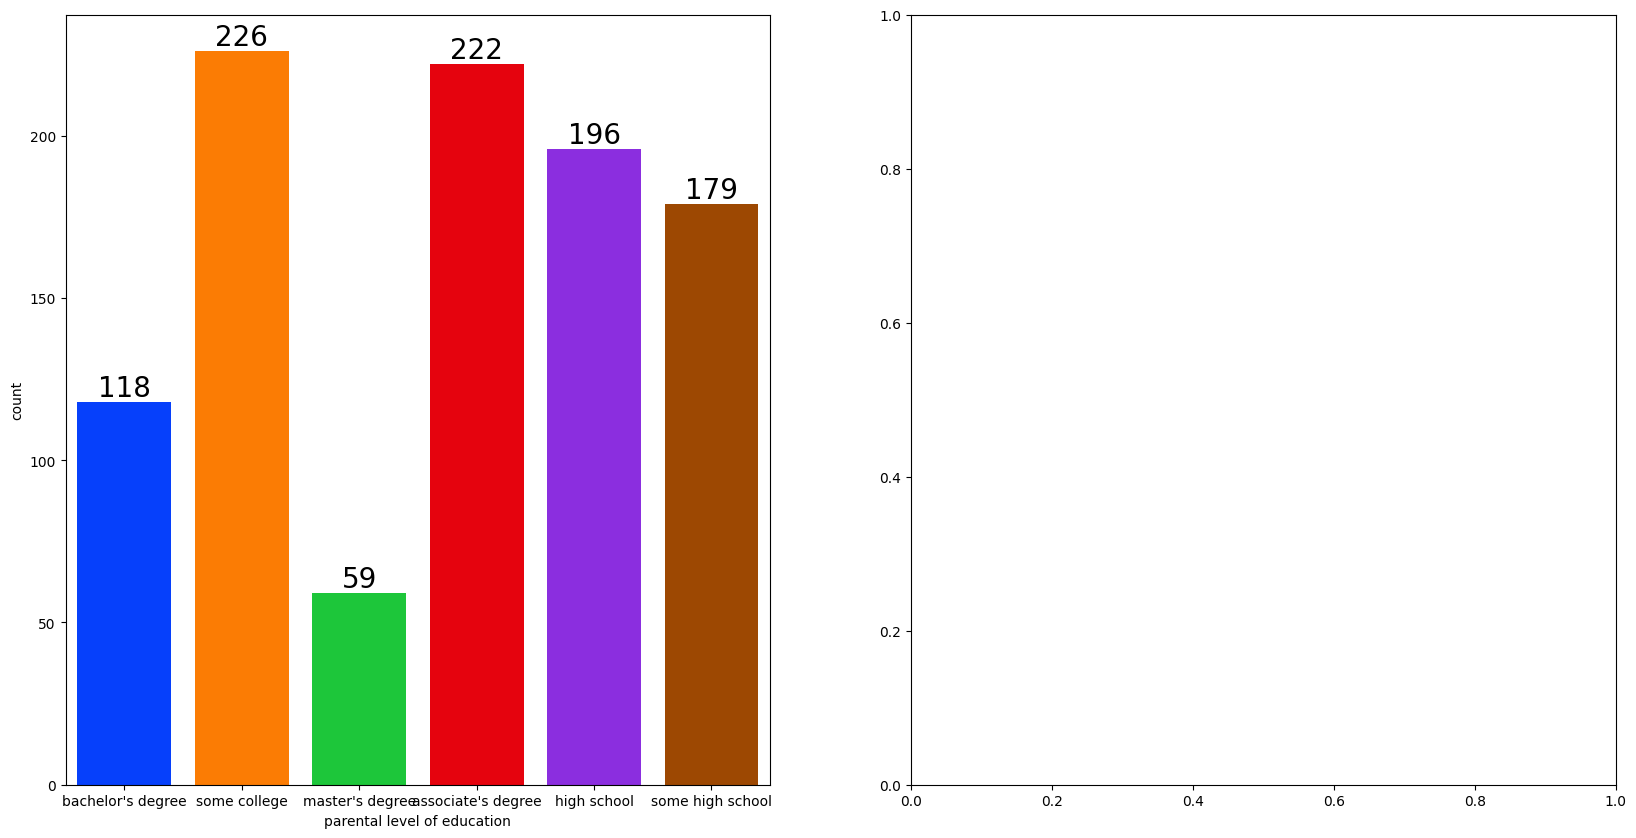

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['parental level of education'], data=df, palette='bright', ax=ax[0], saturation=0.97)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

gender_counts = df['parental level of education'].value_counts()

plt.show()

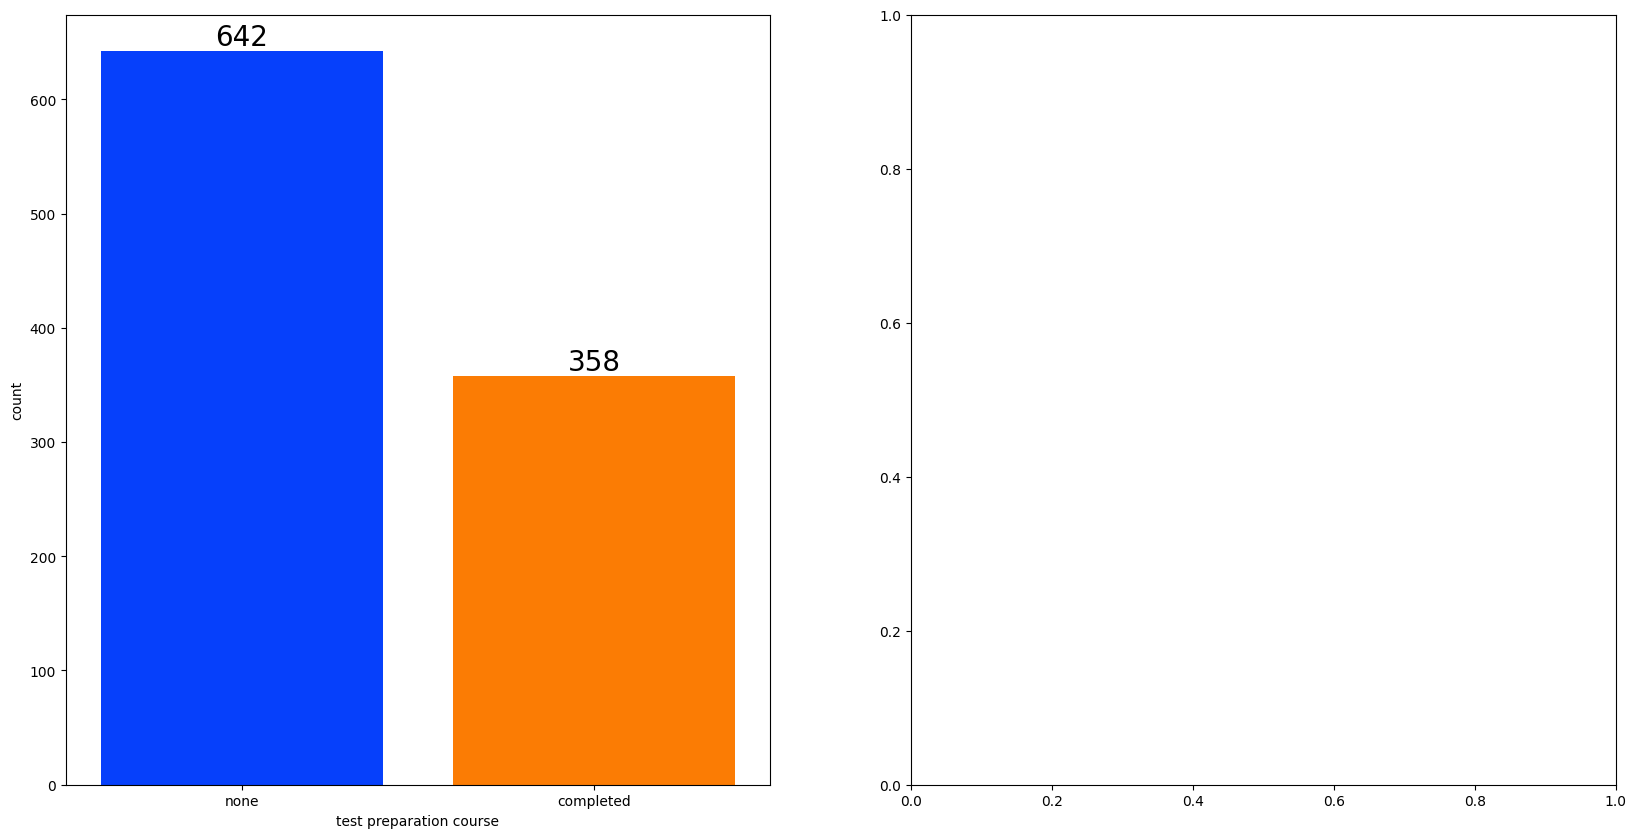

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['test preparation course'], data=df, palette='bright', ax=ax[0], saturation=0.97)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

gender_counts = df['test preparation course'].value_counts()

plt.show()

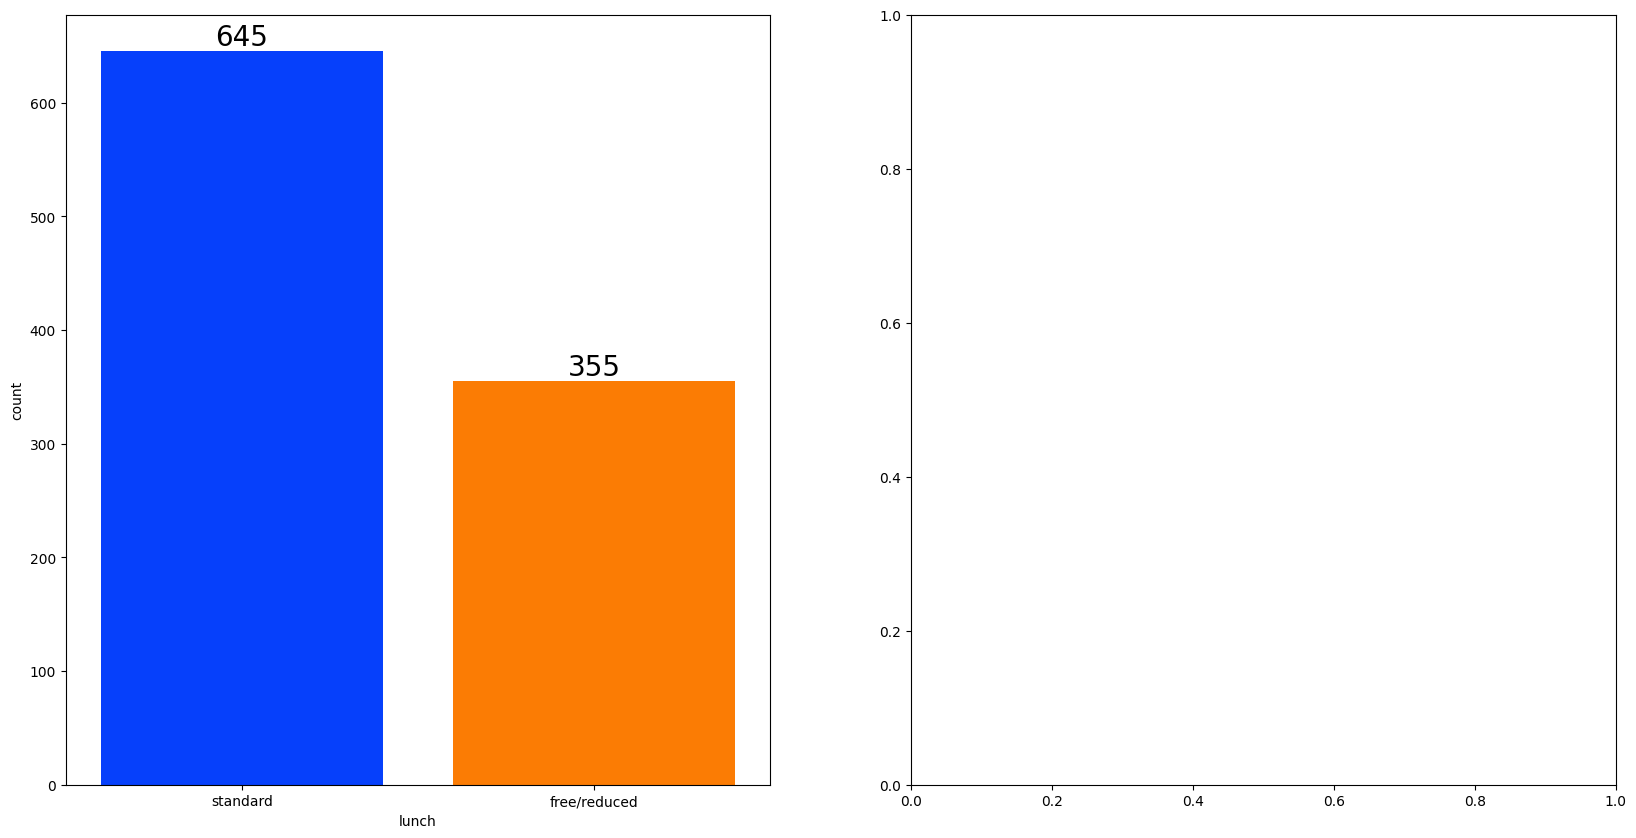

In [24]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['lunch'], data=df, palette='bright', ax=ax[0], saturation=0.97)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

gender_counts = df['lunch'].value_counts()

plt.show()